In [2]:
import matplotlib.pyplot as plt
import numpy as np

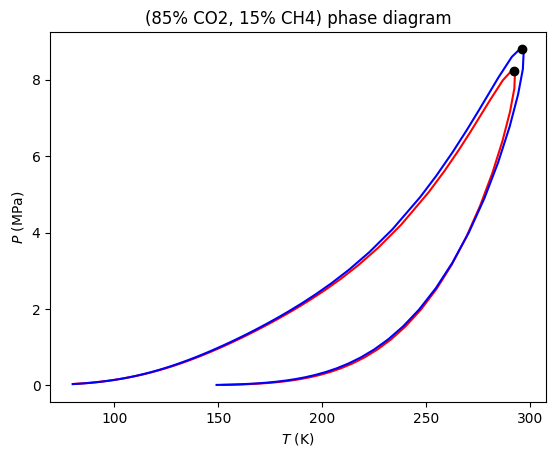

<Figure size 640x480 with 0 Axes>

In [3]:
import sys
sys.path.insert(0,'../pycThermopack/')
# Importing pyThermopack
from thermopack.tcPR import tcPR
from thermopack.pcsaft import pcsaft

# Importing Numpy (math, arrays, etc...)
import numpy as np
# Importing Matplotlib (plotting)
import matplotlib.pyplot as plt

# Instanciate and init tcPR object. Translated and consistent cubic EoS by le Guennec et al. (10.1016/j.fluid.2016.09.003)

tc_pr = tcPR("CO2,C1")
pc_saft = pcsaft("CO2,C1")
models = [tc_pr, pc_saft]
colors = ['r','b']
# Plot phase envelope
z = np.array([0.85,0.15])
for model in models:   
    T, P, v = model.get_envelope_twophase(1.0e4, z, maximum_pressure=1.5e7, calc_v=True)
    Tc, vc, Pc = model.critical(z)
    plt.plot(T, P * 1.0e-6, color = colors[models.index(model)])
    plt.plot([Tc], [Pc * 1.0e-6], "ko")


plt.ylabel(r"$P$ (MPa)")
plt.xlabel(r"$T$ (K)")
plt.title("(85% CO2, 15% CH4) phase diagram")
plt.show()
plt.clf()

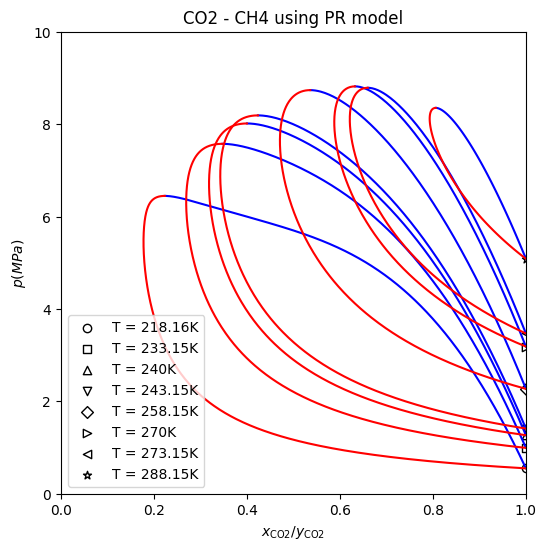

In [4]:
#!/usr/bin/python
#Modify system path
import sys
sys.path.insert(0,'../pycThermopack/')
# Importing pyThermopack
from thermopack.cubic import cubic
# Importing Numpy (math, arrays, etc...)
import numpy as np
# Importing Matplotlib (plotting)
import matplotlib.pyplot as plt

Temps = [218.16, 233.15, 240, 243.15, 258.15, 270, 273.15, 288.15]
markers = ['o', 's', '^', 'v', 'D', '>', '<', '*']
plt.figure(1,(6,6))

srk3 = cubic("CO2,C1", "PR")
for Temp in Temps:
    lle, l1ve, l2ve = srk3.get_binary_pxy(Temp, minimum_pressure=0, maximum_pressure=25e6)
    plt.plot(l1ve.x, l1ve.p*1e-6, color="b", ls= "-", label='_nolegend_')
    plt.plot(l1ve.y, l1ve.p*1e-6, color="r", ls="-",label='_nolegend_')
    plt.scatter(1,l1ve.p[0]*1e-6, color = 'w', linewidths=1, edgecolors='k', marker = markers[Temps.index(Temp)], label = 'temp')
plt.xlim(0,1)
plt.ylim(0,10)


plt.legend(['T = ' + str(element)+'K' for element in Temps])    
plt.xlabel(r"$x_{\rm{CO2}}/y_{\rm{CO2}}$")
plt.ylabel(r"$p (MPa)$")
plt.title(r"CO2 - CH4 using PR model")

plt.show()

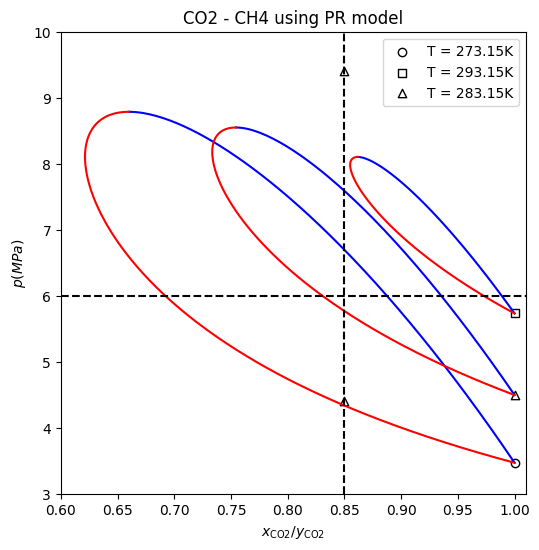

In [5]:
#!/usr/bin/python
#Modify system path
import sys
sys.path.insert(0,'../pycThermopack/')
# Importing pyThermopack
from thermopack.cubic import cubic
# Importing Numpy (math, arrays, etc...)
import numpy as np
# Importing Matplotlib (plotting)
import matplotlib.pyplot as plt

Temps = [273.15, 293.15, 283.15]
markers = ['o', 's', '^', 'v', 'D', '>', '<', '*']
plt.figure(1,(6,6))

srk3 = cubic("CO2,C1", "PR")
for Temp in Temps:
    lle, l1ve, l2ve = srk3.get_binary_pxy(Temp, minimum_pressure=0, maximum_pressure=25e6)
    plt.plot(l1ve.x, l1ve.p*1e-6, color="b", ls= "-", label='_nolegend_')
    plt.plot(l1ve.y, l1ve.p*1e-6, color="r", ls="-",label='_nolegend_')
    plt.scatter(1,l1ve.p[0]*1e-6, color = 'w', linewidths=1, edgecolors='k', marker = markers[Temps.index(Temp)], label = 'temp')
plt.xlim(0.6,1.01)
plt.ylim(3,10)
plt.axvline(.85,color = 'k', linestyle = '--')
plt.axhline(6,color = 'k', linestyle = '--')

plt.scatter(.85,9.4, color = 'w', linewidths=1, edgecolors='k', marker = markers[Temps.index(Temp)], label = 'temp')
plt.scatter(.85,4.4, color = 'w', linewidths=1, edgecolors='k', marker = markers[Temps.index(Temp)], label = 'temp')
plt.legend(['T = ' + str(element)+'K' for element in Temps])    
plt.xlabel(r"$x_{\rm{CO2}}/y_{\rm{CO2}}$")
plt.ylabel(r"$p (MPa)$")
plt.title(r"CO2 - CH4 using PR model")

plt.show()

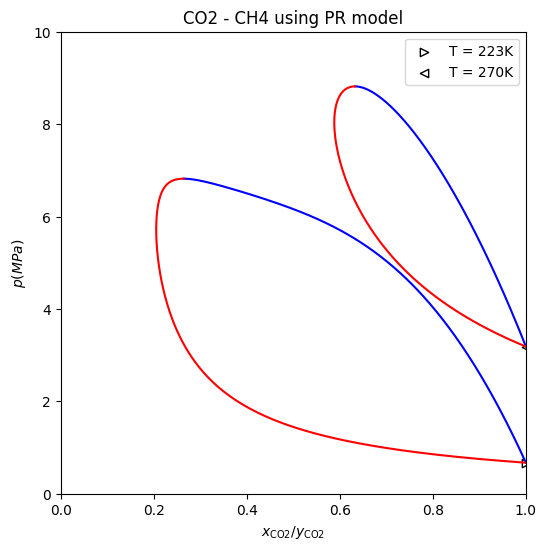

In [6]:
#!/usr/bin/python
#Modify system path
import sys
sys.path.insert(0,'../pycThermopack/')
# Importing pyThermopack
from thermopack.cubic import cubic
# Importing Numpy (math, arrays, etc...)
import numpy as np
# Importing Matplotlib (plotting)
import matplotlib.pyplot as plt

Temps = [223, 270]
markers = ['>', '<']
plt.figure(1,(6,6))

srk3 = cubic("CO2,C1", "PR")
for Temp in Temps:
    lle, l1ve, l2ve = srk3.get_binary_pxy(Temp, minimum_pressure=0, maximum_pressure=25e6)
    plt.plot(l1ve.x, l1ve.p*1e-6, color="b", ls= "-", label='_nolegend_')
    plt.plot(l1ve.y, l1ve.p*1e-6, color="r", ls="-",label='_nolegend_')
    plt.scatter(1,l1ve.p[0]*1e-6, color = 'w', linewidths=1, edgecolors='k', marker = markers[Temps.index(Temp)], label = 'temp')
plt.xlim(0,1)
plt.ylim(0,10)




plt.legend(['T = ' + str(element)+'K' for element in Temps])    
plt.xlabel(r"$x_{\rm{CO2}}/y_{\rm{CO2}}$")
plt.ylabel(r"$p (MPa)$")
plt.title(r"CO2 - CH4 using PR model")

plt.show()

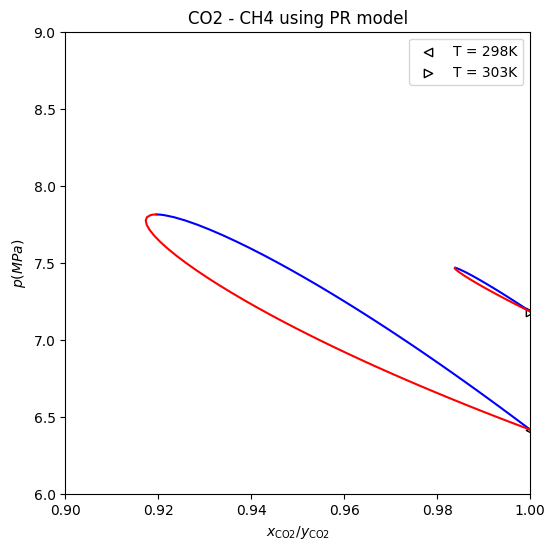

In [7]:
#!/usr/bin/python
#Modify system path
import sys
sys.path.insert(0,'../pycThermopack/')
# Importing pyThermopack
from thermopack.cubic import cubic
# Importing Numpy (math, arrays, etc...)
import numpy as np
# Importing Matplotlib (plotting)
import matplotlib.pyplot as plt

Temps = [298, 303]
markers = ['<', '>']
plt.figure(1,(6,6))

srk3 = cubic("CO2,C1", "PR")
for Temp in Temps:
    lle, l1ve, l2ve = srk3.get_binary_pxy(Temp, minimum_pressure=0, maximum_pressure=25e6)
    plt.plot(l1ve.x, l1ve.p*1e-6, color="b", ls= "-", label='_nolegend_')
    plt.plot(l1ve.y, l1ve.p*1e-6, color="r", ls="-",label='_nolegend_')
    plt.scatter(1,l1ve.p[0]*1e-6, color = 'w', linewidths=1, edgecolors='k', marker = markers[Temps.index(Temp)], label = 'temp')
plt.xlim(0.9,1)
plt.ylim(6,9)



plt.legend(['T = ' + str(element)+'K' for element in Temps])    
plt.xlabel(r"$x_{\rm{CO2}}/y_{\rm{CO2}}$")
plt.ylabel(r"$p (MPa)$")
plt.title(r"CO2 - CH4 using PR model")

plt.show()

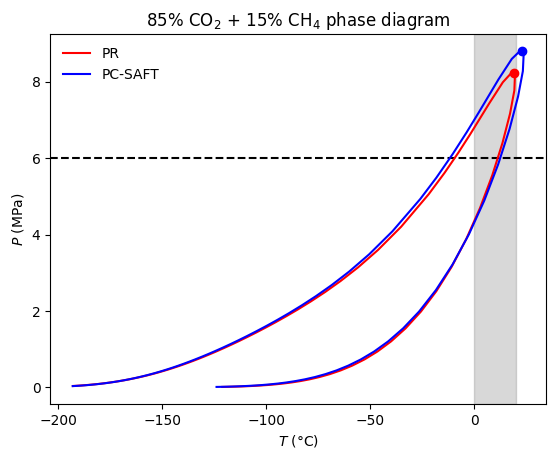

<Figure size 640x480 with 0 Axes>

In [8]:
#!/usr/bin/python
import sys
sys.path.insert(0,'../pycThermopack/')
import matplotlib.pyplot as plt
import numpy as np
from thermopack.extended_csp import ext_csp
from thermopack.pcsaft import pcsaft
from thermopack.tcPR import tcPR


tc_pr = tcPR("CO2,C1")
pcs = pcsaft("CO2,C1")

eoss = [tc_pr, pcs]
colors = ["r", "b"]

# Plot phase envelope
x = .85
z = np.array([x, 1-x])

plt.axvspan(0, 20, alpha=0.3, color='gray')

# plt.axvline(0, color='black', alpha=1, linestyle = '--')
# plt.axvline(20, color='black', alpha=1, linestyle = '--')
plt.axhline(6, color='black', alpha=1, linestyle = '--')

for i, eos in enumerate(eoss):
    label = eos.get_model_id()
    T, P, v = eos.get_envelope_twophase(1.0e4,
                                        z,
                                        maximum_pressure=1.5e7,
                                        calc_v=True)
    Tc, vc, Pc = eos.critical(z)
    plt.plot(T - 273, P*1.0e-6, color=colors[i], label=label)
    plt.plot([Tc- 273], [Pc*1.0e-6], color=colors[i], marker="o")
plt.ylabel(r"$P$ (MPa)")
plt.xlabel(r"$T$ (°C)")
leg = plt.legend(loc="best", numpoints=1, frameon=False)
plt.title(str(int(100*x)) + "% CO$_2$ + " + str(int(100-100*x)) + "% CH$_4$ phase diagram")
# experimental data?
plt.show()
plt.clf()




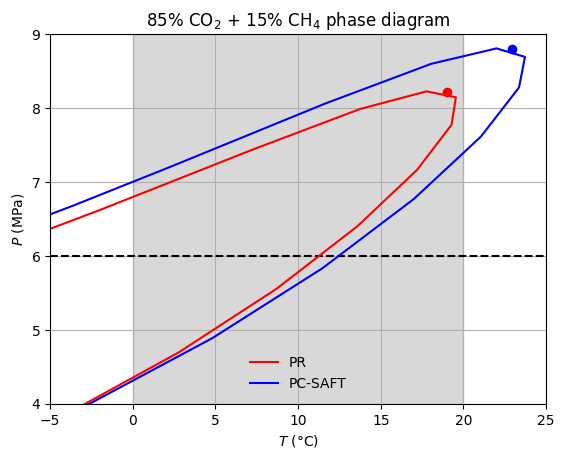

<Figure size 640x480 with 0 Axes>

In [29]:
#!/usr/bin/python
import sys
sys.path.insert(0,'../pycThermopack/')
import matplotlib.pyplot as plt
import numpy as np
from thermopack.extended_csp import ext_csp
from thermopack.pcsaft import pcsaft
from thermopack.tcPR import tcPR


tc_pr = tcPR("CO2,C1")
pcs = pcsaft("CO2,C1")

eoss = [tc_pr, pcs]
colors = ["r", "b"]

# Plot phase envelope
x = .85
z = np.array([x, 1-x])

plt.axvspan(0, 20, alpha=0.3, color='gray')

# plt.axvline(0, color='black', alpha=1, linestyle = '--')
# plt.axvline(20, color='black', alpha=1, linestyle = '--')
plt.axhline(6, color='black', alpha=1, linestyle = '--')


P1 = []
P2 = []
T1 = []
T2 = []
for i, eos in enumerate(eoss):
    label = eos.get_model_id()
    T, P, v = eos.get_envelope_twophase(1.0e4,
                                        z,
                                        maximum_pressure=1.5e7,
                                        calc_v=True)
    Tc, vc, Pc = eos.critical(z)
    plt.plot(T - 273, P*1.0e-6, color=colors[i], label=label)
    plt.plot([Tc- 273], [Pc*1.0e-6], color=colors[i], marker="o")
    if label == 'PR':
          P1.append(P*1.0e-6)
          T1.append(T-273.15)
    else:
          P2.append(P*1.0e-6)
          T2.append(T-273.15)
         
plt.ylabel(r"$P$ (MPa)")
plt.xlabel(r"$T$ (°C)")
plt.title(str(int(100*x)) + "% CO$_2$ + " + str(int(100-100*x)) + "% CH$_4$ phase diagram")





leg = plt.legend(loc="best", numpoints=1, frameon=False)
plt.xlim(-5,25)
plt.ylim(4,9)
plt.grid()
plt.show()
plt.clf()




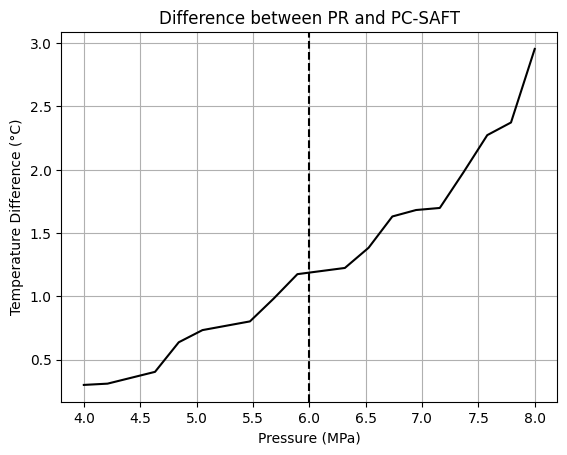

In [30]:
Temp1 = T1[0][29:36]
Press1 = P1[0][29:36]
Temp2 = T2[0][29:36]
Press2 = P2[0][29:36]

# Define a temperature range
press_range = np.linspace(4,8, 20)

# Interpolate pressures for both sets of temperatures
interp_temp1 = np.interp(press_range, Press1, Temp1)
interp_temp2 = np.interp(press_range, Press2, Temp2)

# Subtract interpolated pressures
diff_temp = interp_temp2 - interp_temp1

# Plot the difference
plt.plot(press_range, diff_temp, color = 'black')
plt.axvline(6,color = 'k', linestyle = '--')
plt.xlabel('Pressure (MPa)')
plt.ylabel('Temperature Difference (°C)')
plt.title('Difference between PR and PC-SAFT')
plt.grid(True)
plt.show()